In [1]:
# Part -1
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import kstest
import seaborn as sns
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/vinodhkumar/Downloads/df.xlsx')
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [3]:
# Finding Mean and Standard deviation for all column
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


In [4]:
df.isnull().sum()

Close_ETF    0
oil          0
gold         0
JPM          0
dtype: int64

In [5]:
# the sample correlations among each pair of the four random variables (columns) of the data.
corr = df.corr()
corr_mat = df.corr().abs()
corr_mat

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,0.009045,0.022996,0.036807
oil,0.009045,1.000000,0.235650,0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,0.120849,0.100170,1.000000


[Text(0.5, 0, 'Close_ETF'),
 Text(1.5, 0, 'oil'),
 Text(2.5, 0, 'gold'),
 Text(3.5, 0, 'JPM')]

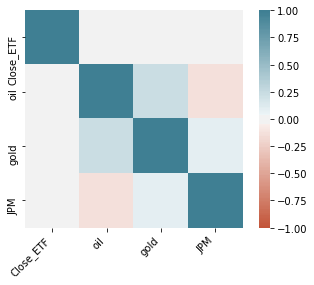

In [6]:
# Heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [7]:
# Part-2

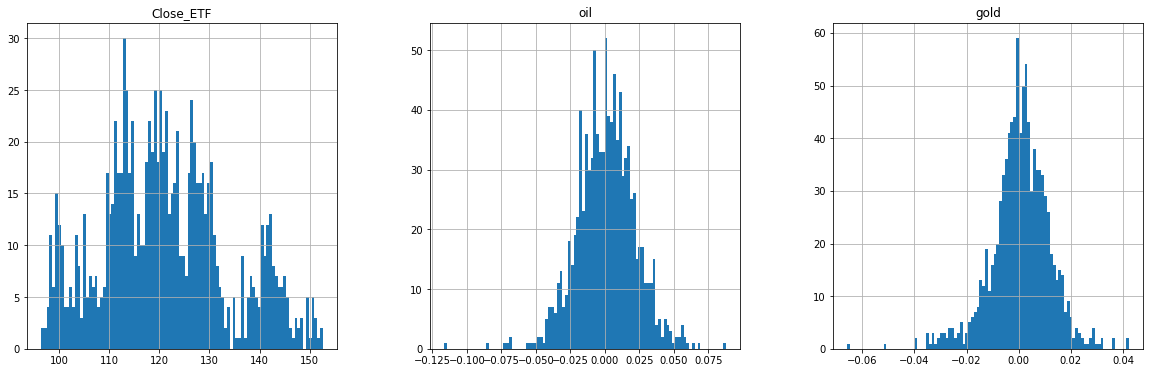

In [8]:
# 1. A histogram for each column (hint: four histograms total)
fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(20, 6))
for col, axis in zip(df.columns, axes):
    df.hist(column = col, bins = 100, ax=axis)

In [9]:
# 2. A time series plot for each column (hint: use the series “1, 2, 3, ..., 1000” as the 
# horizontal axis; four plots total)

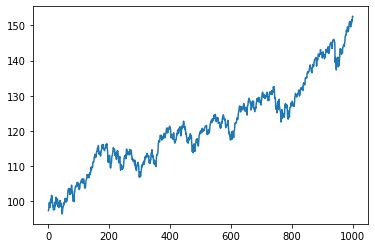

In [10]:
xaxis = np.arange(1,1001)
plt.plot(xaxis, np.array(df['Close_ETF']))
plt.show()

In [11]:
y=np.array(df['Close_ETF'])

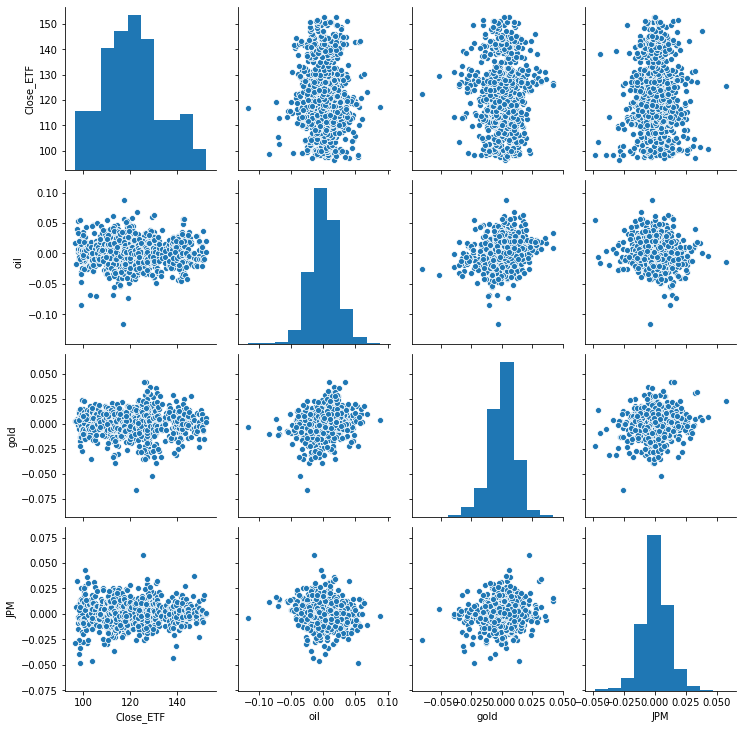

In [12]:
#3. A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)
sns.pairplot(df)

In [13]:
#4. Three scatter plots to describe the relationships between the ETF column and the OIL
# column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

Text(0, 0.5, 'oil')

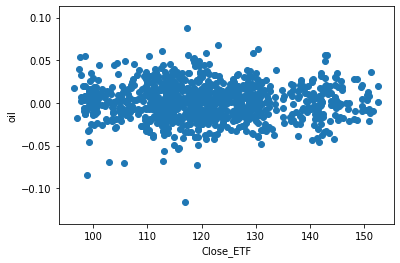

In [14]:
# Scatter Plot between ETF column and the OIL column
plt.scatter(df['Close_ETF'], df['oil'])
plt.xlabel('Close_ETF')
plt.ylabel('oil')

Text(0, 0.5, 'gold')

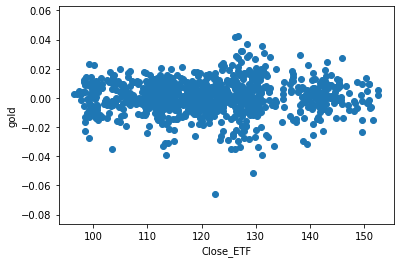

In [15]:
# Scatter Plot between ETF column and the GOLD column
plt.scatter(df['Close_ETF'], df['gold'])
plt.xlabel('Close_ETF')
plt.ylabel('gold')

Text(0, 0.5, 'JPM')

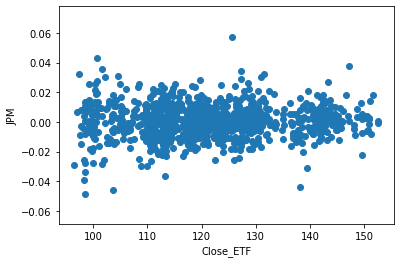

In [16]:
# Scatter Plot between ETF column and the JPM column
plt.scatter(df['Close_ETF'], df['JPM'])
plt.xlabel('Close_ETF')
plt.ylabel('JPM')

In [17]:
# Part-3
# Gaussian distribution checking for Close_ETF column (univariate observations)

seed(1)
data = df['Close_ETF']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=1.000, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=1302.829, p=0.000
Acc to chisquare test Sample does not look Gaussian (reject H0)
Statistics=27.148, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [18]:
# Gaussian distribution checking for Oil column (univariate observations)

seed(1)
data = df['oil']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.473, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=431.505, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=41.448, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [19]:
# Gaussian distribution checking for Gold column (univariate observations)

seed(1)
data = df['gold']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.483, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=192.077, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=105.760, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [20]:
# Gaussian distribution checking for Oil column (univariate observations)

seed(1)
data = df['JPM']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.483, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=228.584, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=52.298, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [21]:
# Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem

In [22]:
# Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.
# Mean for ETF Column
mean = df.mean(axis = 0, skipna = True) 
ETF_mean = mean[0]
print(f'Mean for ETF Column {ETF_mean}')

# Standard deviation for ETF Column
std = df.std(axis = 0, skipna = True) 
ETF_std = std[0]
print(f'Standard deviation for ETF Column {ETF_std}')

Mean for ETF Column 121.1529600120001
Standard deviation for ETF Column 12.569790313110744


In [23]:
# # Break the population into 50 groups sequentially and each group includes 20 values.
seq_sample_means =[]
for split in np.split(df['Close_ETF'], 50):
    seq_sample_means.append(split.mean())
print(seq_sample_means)

[99.32100080000002, 99.55399975000002, 99.15400055, 102.55050039999999, 103.29199995000002, 105.09350015, 106.75099974999998, 111.6580009, 114.49950014999997, 114.40050045000001, 112.77649960000001, 112.28599980000001, 111.80899929999998, 113.27149915, 109.9474991, 110.14300039999998, 112.53550034999998, 112.0754997, 117.78150055, 120.0504997, 118.20800089999997, 119.98099934999998, 119.76750025000001, 116.80299985000003, 117.24199984999998, 120.55450105, 121.09150044999998, 123.40999985, 122.7170002, 120.61099994999998, 120.50799975000002, 125.79700005, 126.88300015, 127.30250020000003, 128.43750040000003, 130.13649915, 130.58250049999998, 128.15899955, 125.12550015, 126.06000055000001, 129.02949995, 131.8114998, 135.97399985, 138.857, 141.28849860000003, 142.17150035, 144.62450029999997, 140.5229988, 144.69050135000003, 150.35049894999997]


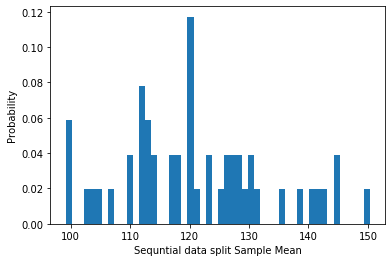

In [24]:
# Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, 
# i.e., use the histogram to assess the normality of the data consisting of these sample means.
plt.hist(seq_sample_means, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sequntial data split Sample Mean');

In [25]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

# To be done

[100.77430028999999, 110.48050028, 112.01809938999999, 114.51720014000003, 118.40030003999999, 121.67680029999993, 125.78560010999992, 128.01269997999995, 135.3920996399999, 144.47199995]


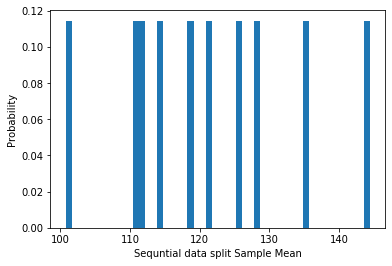

In [26]:
seq_sample_means_10 =[]
for split in np.split(df['Close_ETF'], 10):
    seq_sample_means_10.append(split.mean())
print(seq_sample_means_10)
plt.hist(seq_sample_means_10, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sequntial data split Sample Mean');

In [27]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

# To be done

In [28]:
# Generate 50 simple random samples or groups (with replacement) from the population.
# The size of each sample is 20, i.e., each group includes 20 values

sample_means =[] 
for _ in range(50):
    sample = df['Close_ETF'].sample(20, replace = True)
    mean = sample.mean()
    sample_means.append(mean)
print(sample_means)

[122.14449965000001, 123.58499909999998, 119.84849929999999, 118.57250064999998, 120.91999970000002, 120.80900109999997, 121.57049934999998, 122.58249925, 122.46399980000001, 122.16049880000003, 121.23500149999998, 122.3419994, 121.95600005000001, 117.7429996, 116.279, 121.66399994999999, 123.54649994999997, 119.73400085, 118.48100009999999, 123.40049924999998, 125.85850030000002, 121.08800074999999, 118.65199994999998, 120.75150035000001, 120.22400024999999, 120.9835007, 123.63649904999997, 123.34250039999999, 125.77449920000004, 123.01450025000001, 126.3799994, 125.45799830000001, 124.03899955, 121.88950075000002, 118.92400055, 121.81249995, 121.16100039999999, 123.0969997, 114.94600034999999, 122.31700099999996, 125.29949989999997, 122.43400044999998, 119.71249959999997, 118.5744996, 117.55599929999998, 125.11400045, 116.79550015, 118.8014999, 121.7685006, 117.63950044999999]


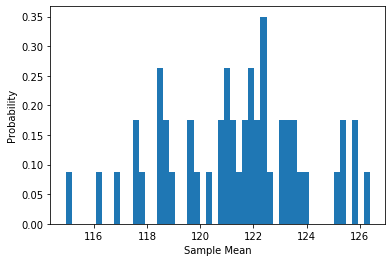

In [29]:
# Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., 
# use the histogram to assess the normality of the data consisting of these sample means.

plt.hist(sample_means, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sample Mean');

In [30]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

# To be done

In [31]:
# Generate 10 simple random samples or groups (with replacement) from the population.
# The size of each sample is 100, i.e., each group includes 100 values

sample_means_10 =[] 
for _ in range(10):
    sample = df['Close_ETF'].sample(100, replace = True)
    mean = sample.mean()
    sample_means_10.append(mean)
print(sample_means_10)

[123.55849980000006, 119.91340048000008, 120.58619983000003, 118.85829999000003, 122.33030006999999, 122.26899990999996, 120.09370038999995, 122.77630032999996, 120.54989912999997, 120.58039922999998]


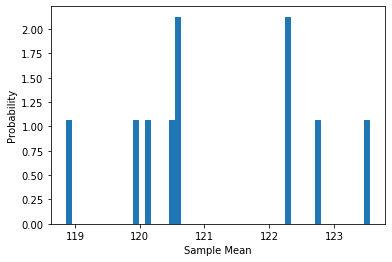

In [32]:
# # Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., 
# use the histogram to assess the normality of the data consisting of these sample means.


plt.hist(sample_means_10, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sample Mean');

In [33]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

# To be done

In [34]:
# In Part 3 of the project, you have figured out the distribution of the population (the entire
# ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.